# 原式数据集

In [1]:
# import torch
# from torchvision import datasets,transforms
# from torch.utils.data import DataLoader
# from argparse import Namespace
# # from model import MLP

# from torch import nn
# from dataloader import load_data
# from tqdm import tqdm
# device='cuda:7'
# train_inputs,train_lables,test_inputs,test_lables=load_data(100,100,device=torch.device(device))


In [2]:
model_path='./model/best_model2.pth'
device='cuda:7'

In [3]:
from detection.DataGenerator import train_based_self_detection
from alex import AlexNet

model=AlexNet()

maker=train_based_self_detection(
    model_path=model_path,
    device=device,
    model=model
)
input_data,output_label,label,highest_loss,lowest_loss= maker.make_data_pid(
    batch_size=100,
    learning_rate=1,
    channel=3,
    dim1=224,
    dim2=224,
    output_size=100,
    randn_magnification=10,
    confidence=1000
)

# input_data,output_label,label= maker.make_origin_data(test_inputs,test_lables)


/home/tianruiming/Eckart-Young-based-ML-Inference-framework/detection/DataGenerator.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.loa

lr_update: 0


/home/tianruiming/miniconda3/envs/pytorch/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


lr_update: 0.0002
lr_update: 0.00030000000000000003
lr_update: 0.0004
lr_update: 0.0005
lr_update: 0.0006000000000000001
lr_update: 0.0007000000000000001
lr_update: 0.0008000000000000001
lr_update: 0.0009000000000000002
lr_update: 0.0010000000000000002
lr_update: 0.0011000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.00120000

In [4]:
# print(input_data.shape)

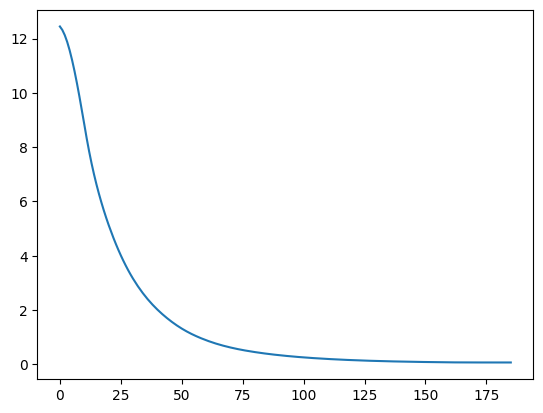

In [5]:
from matplotlib import pyplot as plt
plt.plot(maker.loss_list)

In [6]:
import detection.Model_transfer
import detection.Spliter
import importlib
importlib.reload(detection.Spliter)
importlib.reload(detection.Model_transfer)
import torch

searcher=detection.Spliter.Recrusively_reduce_search(
    model=model,
    model_path=model_path,
    input_data=input_data,
    output_label=output_label,
    label=label,
    device=device,
    highest_loss=highest_loss,
    lowest_loss=lowest_loss,
    # local_speed=2.72e10,   #Flops/s
    local_speed=9.6e9,   #Flops/s
    cloud_speed=1.7e13,    #Flops/s
    network_speed=1e7,     #B/s
)

acc_data=[]
loss_data=[]
best_partition=[]
reduce_step=0.1
searcher.init(reduce_step)

with torch.no_grad():

    for i in range(1,3):
        searcher.search(
            number_of_layer_to_reduce=i,
            alpha=0.8,
            acc_data=acc_data,
            loss_data=loss_data,
            step=reduce_step,
            

        )
        import gc
        gc.collect()
# for i in best_partition:
#     print(i)
#     print()


/home/tianruiming/Eckart-Young-based-ML-Inference-framework/detection/Spliter.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(mode

[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register z

100%|██████████| 10/10 [00:00<00:00, 121.66it/s]
15it [00:55,  3.69s/it]


SVD_finished
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
compute_latency: 1.398775460172549
network_latency: 11.616
total: 13.01477546017255
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxP

In [7]:
print(searcher.F_acc)
print(searcher.F_latency)
print(searcher.best_scheme)
# print(searcher.loss_data)

[np.float64(2.718284064587192), np.float64(2.539865612347869), np.float64(2.545862670507578), np.float64(2.5948392932940094), np.float64(2.579603168085428), np.float64(2.5498045313019406), np.float64(2.5805097985947816), np.float64(2.5350565236735654), np.float64(2.5054363724761655), np.float64(2.381329864458308), np.float64(2.6220076230655276), np.float64(2.5893755027542116), np.float64(2.6253586437716905), np.float64(2.6159782201113733), np.float64(2.573235752763808), np.float64(2.614364293490484), np.float64(2.5892938684312825), np.float64(2.5349367640029143), np.float64(2.5562489508544775), np.float64(2.4264116982449178), np.float64(2.5937042574297973), np.float64(2.603257753166169), np.float64(2.589195084861391), np.float64(2.6187984477461903), np.float64(2.625754025773209), np.float64(2.608789106893878), np.float64(2.6054370054806415), np.float64(2.559783366489993), np.float64(2.5561626960544297), np.float64(2.4968878740319336), np.float64(2.611832322248751), np.float64(2.6146262

58


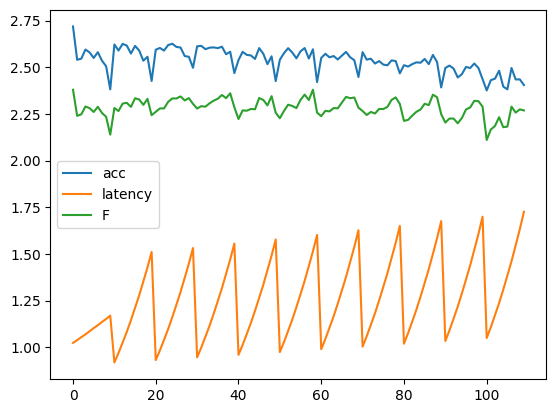

In [9]:
from matplotlib import pyplot as plt
import numpy as np
plt.plot(searcher.F_acc,label='acc')
plt.plot(searcher.F_latency,label='latency')
# plt.plot(searcher.loss_data,label='origin_loss')
# plt.scatter(np.arange(len(searcher.F_list)),searcher.F_list)
plt.plot(searcher.F_list,label='F')
print(searcher.F_list.index(max(searcher.F_list)))
# plt.scatter(np.arange(len(searcher.F_latency)),searcher.F_latency)
plt.legend()